In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('input/bigmart.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
data=data.drop('Item_Identifier',axis=1)
data.select_dtypes('object').isnull().sum()

Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [3]:
#Checking the frequency of all categories in the variable
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [4]:
#Missing value Treatment
data['Outlet_Size'].fillna('Medium',inplace=True)

In [5]:
#Finding the average sales based on the Item Type
x=data['Item_Outlet_Sales'].groupby(data['Item_Type']).agg('mean')
x

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [6]:
#Sort the unique categories of the Item Type column
y = np.sort(data['Item_Type'].unique())
y

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [7]:
#Replacing the categories by the mean of the target variable

data['Item_Type']=data['Item_Type'].replace((y),(x.values))
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,2232.542597,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,2006.511735,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,2158.977911,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,2289.009592,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,2258.784300,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Label Encoding
 In Label encoding, each category is assigned a value from 1 through N where N is the number of categories for the category feature. 

In [8]:
#Label Encoding four categorical variables

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Item_Fat_Content_enc']=le.fit_transform(data['Item_Fat_Content'])
data['Item_Type_enc']=le.fit_transform(data['Item_Type'])
data['Outlet_Size_enc']=le.fit_transform(data['Outlet_Size'])
data['Outlet_Type_enc']=le.fit_transform(data['Outlet_Type'])
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_enc,Item_Type_enc,Outlet_Size_enc,Outlet_Type_enc
0,9.30,Low Fat,0.016047,2232.542597,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,10,1,1
1,5.92,Regular,0.019278,2006.511735,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2,2,1,2
2,17.50,Low Fat,0.016760,2158.977911,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,7,1,1
3,19.20,Regular,0.000000,2289.009592,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2,13,1,0
4,8.93,Low Fat,0.000000,2258.784300,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,11,0,1


### Feature mapping
A feature map is a function which maps a data vector to feature space. The main logic in machine learning for doing so is to present your learning algorithm with data that it is better able to regress or classify.

The column Outlet_Size is an ordinal variable. Obviously the category high has more value than the medium and small categories.
So, we perform features mapping in this case where we manually give labels to the categories of the column.

In [9]:
#Performing feature mapping
data['Outlet_Size'] = data['Outlet_Size'].replace(('High','Medium','Small'),(3,2,1))
data['Outlet_Size'].value_counts()

2    5203
1    2388
3     932
Name: Outlet_Size, dtype: int64

### QQ Plot
A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 2181.29 and standard deviation = 1706.40


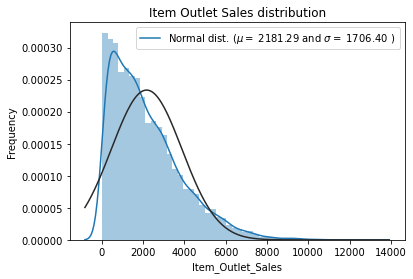

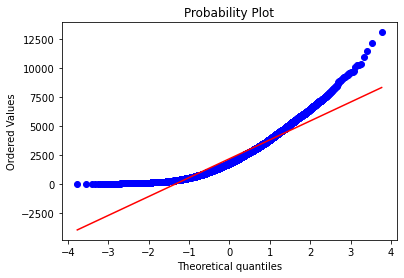

In [10]:
# make the qq plot for the Item Outlet Sales to check for its distribution and skewness

from scipy import stats
from scipy.stats import norm

sns.distplot(data['Item_Outlet_Sales'] , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Item_Outlet_Sales'])
print('mean = {:.2f} and standard deviation = {:.2f}'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Item Outlet Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Item_Outlet_Sales'], plot = plt)
plt.show()

## Binary Encoding

In [11]:
#!pip install category-encoders

In [12]:
import pandas as pd
data = pd.read_csv('input/bigmart.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
#Value count of different categories of Item Type
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
#Importing Binary Encoder function from category_encoder and encoded the Item_Type column
from category_encoders import BinaryEncoder
be=BinaryEncoder()
x = be.fit_transform(data['Item_Type'])
x.head()

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
#Concatenating the original data and encoded dataframe together

data=pd.concat([data,x],axis=1)
data.columns

## BaseN Encoding

In [ ]:
#Reading the fifa dataset
df=pd.read_csv('input/fifa.csv',encoding = 'gb2312')
df.head()

In [ ]:
#Uisng Binary encoder for Name column

from category_encoders import BinaryEncoder
be=BinaryEncoder()
z=be.fit_transform(df['Name'])
z.head()

In [ ]:
#Using BaseN encoder for Name column using the base 4

import category_encoders as ce

a = ce.BaseNEncoder(cols=['Name'],base=4)
a = a.fit_transform(df[['Name']])
a.head()

## OneHot Encoding

In [ ]:
import pandas as pd
data=pd.read_csv('input/employee.csv')
data.head()

In [ ]:
#One hot encoding the Department column
x=pd.get_dummies(data['Department'])

In [ ]:
#Concatenationg original dataset and x together
data=pd.concat([data,x],axis=1)
data.columns